# Introduction

Examples as per sklearn documentation: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

# Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Simple Example

In [2]:
X = np.array([0, 1, 2, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(-1, 1)

In [4]:
X[:4]

array([[0. ],
       [1. ],
       [2. ],
       [3.1]])

In [5]:
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)

In [6]:
X_plot = np.linspace(-5, 15, 1000)[:, np.newaxis]

In [7]:
log_dens = kde.score_samples(X_plot)

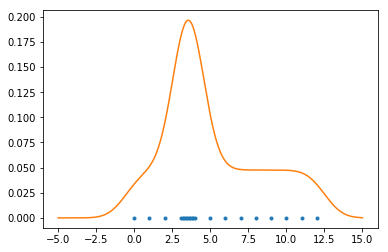

In [8]:
plt.plot(X.ravel(), [0]*len(X), '.')
plt.plot(X_plot, np.exp(log_dens))

# Documentation Example

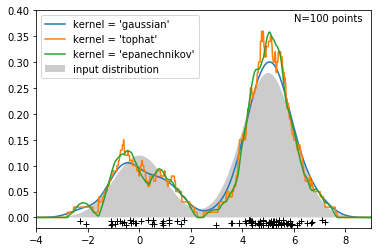

In [9]:
#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()